# 1. Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("Tensorflow Version : ", tf.__version__)
print("Keras Version : ", keras.__version__)

Using TensorFlow backend.


Tensorflow Version :  1.15.0
Keras Version :  2.2.4-tf


# 2. GPU Setting

In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# [참고] https://datamasters.co.kr/33
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# 3. Data Setting

In [3]:
dir_data = "C:/Users/User/Desktop/Project/Full_Ver3.0/" # 데이터 경로
filenames = os.listdir(dir_data)
filenames

['Background (1).png',
 'Background (10).png',
 'Background (11).png',
 'Background (12).png',
 'Background (13).png',
 'Background (14).png',
 'Background (15).png',
 'Background (16).png',
 'Background (17).png',
 'Background (18).png',
 'Background (19).png',
 'Background (2).png',
 'Background (20).png',
 'Background (21).png',
 'Background (22).png',
 'Background (23).png',
 'Background (24).png',
 'Background (25).png',
 'Background (26).png',
 'Background (27).png',
 'Background (28).png',
 'Background (29).png',
 'Background (3).png',
 'Background (30).png',
 'Background (31).png',
 'Background (32).png',
 'Background (33).png',
 'Background (34).png',
 'Background (35).png',
 'Background (4).png',
 'Background (5).png',
 'Background (6).png',
 'Background (7).png',
 'Background (8).png',
 'Background (9).png',
 'Capture_off (1).png',
 'Capture_off (10).png',
 'Capture_off (100).png',
 'Capture_off (101).png',
 'Capture_off (102).png',
 'Capture_off (103).png',
 'Capture_off (1

In [4]:
categories=[]
for filename in filenames:
    
    category = filename.split(" ")[0]
    
    if (category == "RMFD-1_on") or (category == "Capture_on"):
        categories.append(1)
        
    elif (category == "RMFD-1_off") or (category == "Capture_off") or (category == "Multi_off"):
        categories.append(0)
        
    elif category == "Multi_re":
        categories.append(2)
        
    else:
        categories.append(3)
        
data_df = pd.DataFrame({'FileName':filenames, 'Category':categories})

# 이미지 제너레이터에서 class_mode='categorical'로 지정하기 위해 컬럼을 string으로 변경함
data_df['Category'] = data_df['Category'].replace({0:"mask_off", 1:"mask_on", 2:"mask_re", 3:"no_face"})
data_df

,FileName,Category
0,Background (1).png,no_face
1,Background (10).png,no_face
2,Background (11).png,no_face
3,Background (12).png,no_face
4,Background (13).png,no_face
5,Background (14).png,no_face
6,Background (15).png,no_face
7,Background (16).png,no_face
8,Background (17).png,no_face
9,Background (18).png,no_face


In [5]:
train_df, validation_df = train_test_split(data_df, test_size=0.2, stratify=data_df['Category'], random_state=42) 

train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

# 4. Modeling

In [6]:
from keras.models import Sequential
from keras.layers import *

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

model_name = "C:/Users/User/Desktop/Project/Model/MaskCheckModel_Ver1.2.h5"

In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 109, 109, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
__________

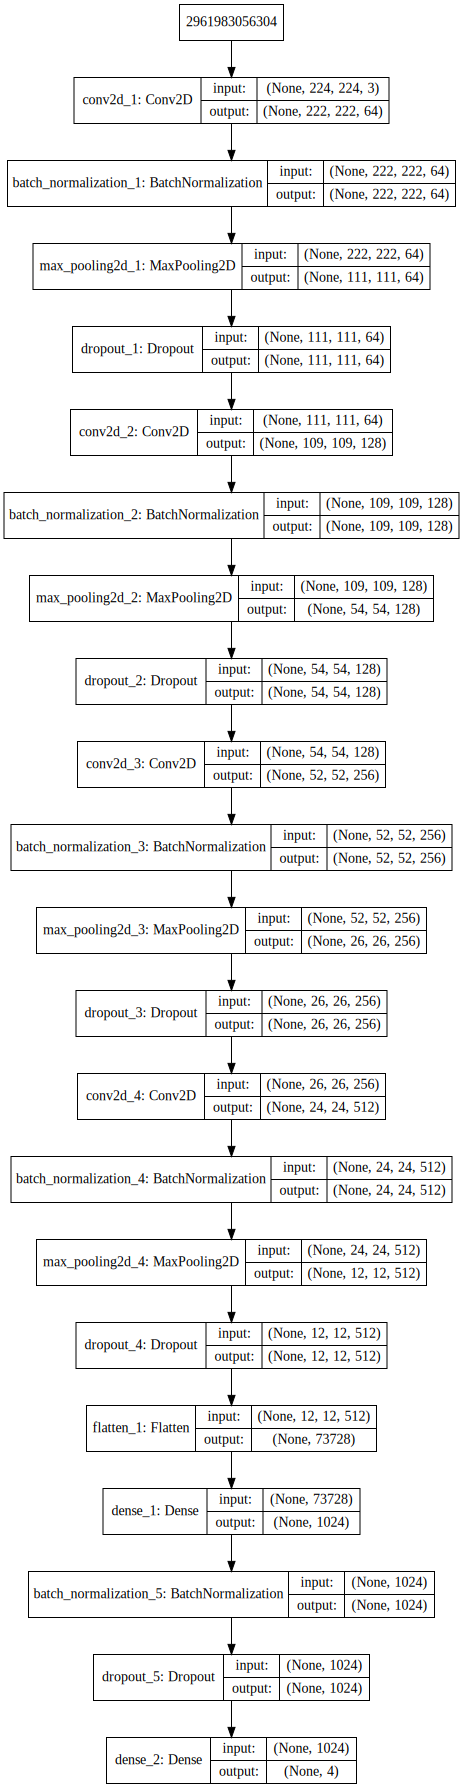

In [8]:
# [참고] https://gaussian37.github.io/dl-keras-%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%AA%A8%EB%8D%B8-%EC%8B%9C%EA%B0%81%ED%99%94/
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

% matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 5. Training

In [8]:
batch_size = 32

In [9]:
# [참고] https://3months.tistory.com/199

train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    zoom_range = 0.5,
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe( # flow_from_directory
    train_df,
    dir_data,
    x_col = 'FileName',
    y_col = 'Category',
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size
)

Found 10666 validated image filenames belonging to 4 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    dir_data,
    x_col = 'FileName',
    y_col = 'Category',
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size
)

Found 2667 validated image filenames belonging to 4 classes.


In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', min_delta=0.01, mode='min', patience=10)

# [참고] https://teddylee777.github.io/tensorflow/keras-%EC%BD%9C%EB%B0%B1%ED%95%A8%EC%88%98-vol-01
# ReduceLROnPlateau : loss가 더이상 개선되지 않으면 lr을 감소시킴
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.00001, verbose=1)
# factor: factor by which the learning rate will be reduced. new_lr = lr * factor

# [참고] https://blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221468928164&redirect=Dlog&widgetTypeCall=true&directAccess=false
checkpoint = ModelCheckpoint(model_name, monitor='val_loss', mode='min', save_best_only=True)

callbacks=[earlystop, learning_rate_reduction, checkpoint]

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
total_train = train_df.shape[0]
total_validation = validation_df.shape[0]

history = model.fit_generator(
    train_generator,
    epochs = 100,
    steps_per_epoch = total_train // batch_size,
    validation_data = validation_generator,
    validation_steps = total_validation // batch_size,
    callbacks = callbacks
)

Epoch 1/100
333/333 [==============================] - 283s 850ms/step - loss: 0.6573 - acc: 0.8272 - val_loss: 1.6138 - val_acc: 0.4646
Epoch 2/100
333/333 [==============================] - 225s 677ms/step - loss: 0.3356 - acc: 0.8883 - val_loss: 0.2967 - val_acc: 0.9085
Epoch 3/100
333/333 [==============================] - 217s 652ms/step - loss: 0.2981 - acc: 0.9002 - val_loss: 0.3279 - val_acc: 0.8797
Epoch 4/100
333/333 [==============================] - 222s 668ms/step - loss: 0.2530 - acc: 0.9105 - val_loss: 0.1565 - val_acc: 0.9469
Epoch 5/100
333/333 [==============================] - 222s 667ms/step - loss: 0.2381 - acc: 0.9162 - val_loss: 0.2551 - val_acc: 0.8991
Epoch 6/100
333/333 [==============================] - 221s 664ms/step - loss: 0.2118 - acc: 0.9276 - val_loss: 0.2120 - val_acc: 0.9294
Epoch 7/100
333/333 [==============================] - 218s 654ms/step - loss: 0.2052 - acc: 0.9288 - val_loss: 0.1424 - val_acc: 0.9598
Epoch 8/100
333/333 [====================

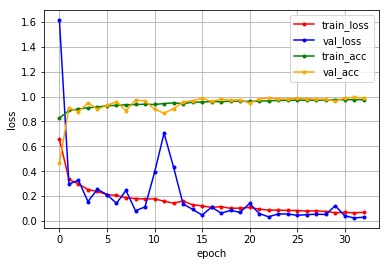

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

xLen = np.arange(len(loss))
plt.plot(xLen, loss, marker=".", c='red', label="train_loss")
plt.plot(xLen, val_loss, marker=".", c='blue', label="val_loss")
plt.plot(xLen, acc, marker=".", c='green', label="train_acc")
plt.plot(xLen, val_acc, marker=".", c='orange', label="val_acc")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

# 6. Model Save

In [22]:
# from keras.models import load_model

# model.save(model_name)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'